In [ ]:
from tensorflow import keras
from tqdm import tqdm

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, Subset
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded as x_train and y_train (NumPy arrays)
# and x_train is already flattened (x_train_svm in your previous examples)

# Convert data to PyTorch tensors (for consistency with other parts of your code)
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(np.argmax(y_train, axis=1)).long()  # Convert to class indices

# Check for MPS device (optional, for GPU acceleration)
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS device")
else:
    device = torch.device("cpu")
    print("MPS device not found, using CPU")

# Move data to the device (if using MPS)
x_train_tensor = x_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)

# Convert tensors to numpy arrays for use with scikit-learn
x_train_np = x_train_tensor.cpu().numpy().reshape(len(x_train_tensor), -1)
y_train_np = y_train_tensor.cpu().numpy()

# Instantiate the Random Forest model (using scikit-learn)
rf_model = RandomForestClassifier(n_estimators=100)
# Plot accuracy from 5 to 1000 estimators
estimators_range = range(50, 2000, 50)
train_accuracies = []
val_accuracies = []

for n_estimators in tqdm(estimators_range):
    rf_model = RandomForestClassifier(n_estimators=n_estimators)
    # Split the data into training, validation, and test sets
    x_train_np, x_test, y_train_np, y_test = train_test_split(x_train_np, y_train_np, test_size=0.2, random_state=42)
    # Train the model on the training set
    rf_model.fit(x_train_np, y_train_np)
    # Make predictions on the validation set
    val_predictions = rf_model.predict(x_test)
    val_accuracy = accuracy_score(y_test, val_predictions)
    print(f'Validation accuracy with {n_estimators} estimators: {val_accuracy}')

    val_accuracies.append(val_accuracy)

Using MPS device


  3%|▎         | 1/39 [00:09<05:44,  9.07s/it]

Validation accuracy with 50 estimators: 0.9631666666666666


  5%|▌         | 2/39 [00:22<07:19, 11.87s/it]

Validation accuracy with 100 estimators: 0.9680208333333333


  8%|▊         | 3/39 [00:39<08:20, 13.90s/it]

Validation accuracy with 150 estimators: 0.9645833333333333


 10%|█         | 4/39 [00:56<08:55, 15.30s/it]

Validation accuracy with 200 estimators: 0.9612630208333334


 13%|█▎        | 5/39 [01:13<08:54, 15.72s/it]

Validation accuracy with 250 estimators: 0.9627746135069162


 15%|█▌        | 6/39 [01:28<08:31, 15.49s/it]

Validation accuracy with 300 estimators: 0.9572736520854527


 18%|█▊        | 7/39 [01:42<07:58, 14.95s/it]

Validation accuracy with 350 estimators: 0.9462809917355371


 21%|██        | 8/39 [01:54<07:16, 14.09s/it]

Validation accuracy with 400 estimators: 0.9471593166468018


 23%|██▎       | 9/39 [02:05<06:32, 13.07s/it]

Validation accuracy with 450 estimators: 0.942374565325385


 26%|██▌       | 10/39 [02:14<05:46, 11.95s/it]

Validation accuracy with 500 estimators: 0.9435133457479826


 28%|██▊       | 11/39 [02:22<05:02, 10.80s/it]

Validation accuracy with 550 estimators: 0.9487975174553918


 31%|███       | 12/39 [02:29<04:20,  9.66s/it]

Validation accuracy with 600 estimators: 0.933074684772066


 33%|███▎      | 13/39 [02:35<03:41,  8.52s/it]

Validation accuracy with 650 estimators: 0.9296969696969697


 36%|███▌      | 14/39 [02:40<03:06,  7.46s/it]

Validation accuracy with 700 estimators: 0.9257575757575758


 38%|███▊      | 15/39 [02:45<02:37,  6.55s/it]

Validation accuracy with 750 estimators: 0.9526515151515151


 41%|████      | 16/39 [02:48<02:10,  5.69s/it]

Validation accuracy with 800 estimators: 0.9146919431279621


 44%|████▎     | 17/39 [02:51<01:48,  4.92s/it]

Validation accuracy with 850 estimators: 0.9053254437869822


 46%|████▌     | 18/39 [02:54<01:29,  4.27s/it]

Validation accuracy with 900 estimators: 0.9185185185185185


 49%|████▊     | 19/39 [02:57<01:13,  3.69s/it]

Validation accuracy with 950 estimators: 0.9120370370370371


 51%|█████▏    | 20/39 [02:59<01:00,  3.19s/it]

Validation accuracy with 1000 estimators: 0.8786127167630058


 54%|█████▍    | 21/39 [03:00<00:49,  2.76s/it]

Validation accuracy with 1050 estimators: 0.855072463768116


 56%|█████▋    | 22/39 [03:02<00:40,  2.41s/it]

Validation accuracy with 1100 estimators: 0.8468468468468469


 59%|█████▉    | 23/39 [03:03<00:33,  2.10s/it]

Validation accuracy with 1150 estimators: 0.9204545454545454


 62%|██████▏   | 24/39 [03:05<00:27,  1.85s/it]

Validation accuracy with 1200 estimators: 0.7605633802816901


 64%|██████▍   | 25/39 [03:06<00:22,  1.64s/it]

Validation accuracy with 1250 estimators: 0.8421052631578947


 67%|██████▋   | 26/39 [03:07<00:19,  1.47s/it]

Validation accuracy with 1300 estimators: 0.8222222222222222


 69%|██████▉   | 27/39 [03:08<00:15,  1.33s/it]

Validation accuracy with 1350 estimators: 0.7777777777777778


 72%|███████▏  | 28/39 [03:09<00:13,  1.22s/it]

Validation accuracy with 1400 estimators: 0.8620689655172413


 74%|███████▍  | 29/39 [03:10<00:11,  1.13s/it]

Validation accuracy with 1450 estimators: 0.6521739130434783


 77%|███████▋  | 30/39 [03:11<00:09,  1.08s/it]

Validation accuracy with 1500 estimators: 0.5263157894736842


 79%|███████▉  | 31/39 [03:11<00:08,  1.02s/it]

Validation accuracy with 1550 estimators: 0.26666666666666666


 82%|████████▏ | 32/39 [03:12<00:06,  1.03it/s]

Validation accuracy with 1600 estimators: 0.75


 85%|████████▍ | 33/39 [03:13<00:05,  1.05it/s]

Validation accuracy with 1650 estimators: 0.6666666666666666


 87%|████████▋ | 34/39 [03:14<00:04,  1.07it/s]

Validation accuracy with 1700 estimators: 0.125


 90%|████████▉ | 35/39 [03:15<00:03,  1.09it/s]

Validation accuracy with 1750 estimators: 0.16666666666666666


 92%|█████████▏| 36/39 [03:16<00:02,  1.10it/s]

Validation accuracy with 1800 estimators: 0.0


 95%|█████████▍| 37/39 [03:17<00:01,  1.10it/s]

Validation accuracy with 1850 estimators: 0.75


 97%|█████████▋| 38/39 [03:18<00:00,  1.09it/s]

Validation accuracy with 1900 estimators: 0.0


100%|██████████| 39/39 [03:19<00:00,  5.11s/it]

Validation accuracy with 1950 estimators: 0.5


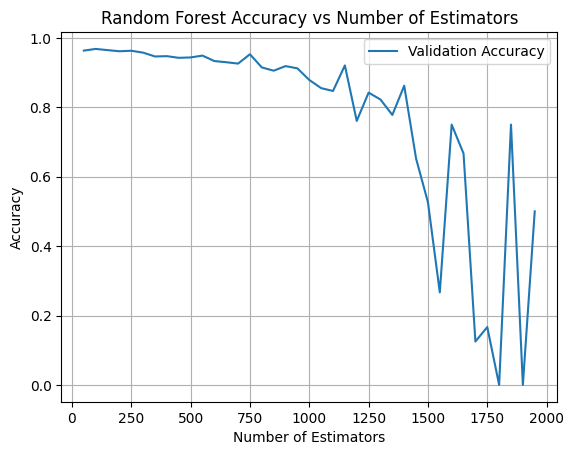

In [ ]:
plt.plot(estimators_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()